In [183]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import plotly.express as px

# Building DataFrames

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
games = pickle.load(open('games.pkl', 'rb'))

In [4]:
games2 = pickle.load(open('games2.pkl', 'rb'))

In [5]:
games2 = games2[10:]

In [6]:
len(games2)

463

In [7]:
len(games)

22631

In [8]:
for x in games2:
    games.append(x)

In [9]:
len(games)

23094

In [10]:
games_full = []
batting = []
pitching = []
pitchers = []

for g in games[:-10]:
    game_summary = g['game']
    game_summary['home_pitcher'] = g['home_pitchers'][0]['name']
    game_summary['away_pitcher'] = g['away_pitchers'][0]['name']
    game_summary['home_score'] = g['home_batting']['R']
    game_summary['away_score'] = g['away_batting']['R']
    games_full.append(game_summary)
    

In [11]:
games_df = pd.DataFrame(games_full).drop_duplicates()

In [12]:
for g in games:
    pairs = [
        ('away_batting', batting),
        ('home_batting', batting),
        ('away_pitching', pitching),
        ('home_pitching', pitching),
        ('away_pitchers',pitchers ),
        ('home_pitchers', pitchers)
    ]
    for key, d in pairs:
        if isinstance(g[key], list):
            for x in g[key]:
                if 'home' in key:
                    x['home?'] = True
                    x['team']=g['game']['home_abbr']
                else:
                    x['home?'] = False
                    x['team'] = g['game']['away_abbr']
                x['game_id'] = g['game']['game_id']
                d.append(x)
                
        else:
            x = g[key]
            if 'home' in key:
                x['home?'] = True
                x['team'] = g['game']['home_abbr']
            else:
                x['home?'] = False
                x['team'] = g['game']['away_abbr']
            x['game_id'] = g['game']['game_id']
            d.append(x)
                

In [13]:
batting = pd.DataFrame(batting).drop_duplicates()

In [14]:
games_df.shape

(20654, 9)

In [15]:
pitching = pd.DataFrame(pitching).drop_duplicates()

In [16]:
pitching.shape

(41328, 29)

In [17]:
pitchers = pd.DataFrame(pitchers).drop_duplicates()

In [18]:
batting.head()

,AB,R,H,RBI,BB,SO,PA,batting_avg,onbase_perc,slugging_perc,onbase_plus_slugging,pitches,strikes_total,wpa_bat,leverage_index_avg,wpa_bat_pos,wpa_bat_neg,cwpa_bat,cli_avg,re24_bat,PO,A,details,home?,team,game_id
0,33,3,7,2,2,10,35,.212,.257,.364,.621,125,83,-0.231,1.01,0.525,-0.756%,-0.14%,0.98,-1.8,24,7,,False,CHW,ANA202104010
1,30,4,6,4,4,10,34,.200,.294,.300,.594,140,92,0.266,1.68,1.072,-0.806%,0.15%,1.58,-0.3,27,10,,True,LAA,ANA202104010
2,35,5,9,5,11,10,47,.257,.447,.400,.847,214,122,0.172,1.05,0.985,-0.814%,0.11%,1.11,0.4,27,8,,False,PIT,CHN202104010
3,26,3,2,3,4,13,34,.077,.182,.154,.336,151,91,-0.329,1.24,0.409,-0.738%,-0.20%,1.26,-1.6,27,13,,True,CHC,CHN202104010
4,37,11,10,9,3,7,41,.270,.341,.486,.828,146,102,0.473,0.38,0.601,-0.128%,0.31%,0.41,5.8,27,4,,False,STL,CIN202104010


In [19]:
#games_df = games_df_temp[10:]

In [20]:
games_df.shape

(20654, 9)

In [21]:
games_df[['day', 'del1','del2','date']] = games_df['date'].str.extract('(\w+)(,)(\s+)(\w+\s+\d+\W+\s+\d+)', expand=True )
games_df = games_df.drop(columns = ['del1','del2'])

In [22]:
cond = (games_df['home_score']>games_df['away_score'], games_df['home_score']<games_df['away_score'])
choices = (True, False)
games_df['Home_win'] = np.select(cond, choices)

In [23]:
numeric_pitching = pitching.columns.to_list()[:-3]

In [196]:
numeric_pitching

['IP',
 'H',
 'R',
 'ER',
 'BB',
 'SO',
 'HR',
 'earned_run_avg',
 'batters_faced',
 'pitches',
 'strikes_total',
 'strikes_contact',
 'strikes_swinging',
 'strikes_looking',
 'inplay_gb_total',
 'inplay_fb_total',
 'inplay_ld',
 'inplay_unk',
 'game_score',
 'inherited_runners',
 'inherited_score',
 'wpa_def',
 'leverage_index_avg',
 'cwpa_def',
 'cli_avg',
 're24_def']

In [24]:
for x in numeric_pitching:
    try:
        pitching[x] = pitching[x].astype(float)
    except ValueError:
        pass

In [25]:
pitching.dtypes

IP                    float64
H                     float64
R                     float64
ER                    float64
BB                    float64
SO                    float64
HR                    float64
earned_run_avg        float64
batters_faced         float64
pitches               float64
strikes_total         float64
strikes_contact       float64
strikes_swinging      float64
strikes_looking       float64
inplay_gb_total       float64
inplay_fb_total       float64
inplay_ld             float64
inplay_unk            float64
game_score            float64
inherited_runners      object
inherited_score        object
wpa_def               float64
leverage_index_avg    float64
cwpa_def               object
cli_avg               float64
re24_def              float64
home?                    bool
team                   object
game_id                object
dtype: object

In [26]:
batting.head()

,AB,R,H,RBI,BB,SO,PA,batting_avg,onbase_perc,slugging_perc,onbase_plus_slugging,pitches,strikes_total,wpa_bat,leverage_index_avg,wpa_bat_pos,wpa_bat_neg,cwpa_bat,cli_avg,re24_bat,PO,A,details,home?,team,game_id
0,33,3,7,2,2,10,35,.212,.257,.364,.621,125,83,-0.231,1.01,0.525,-0.756%,-0.14%,0.98,-1.8,24,7,,False,CHW,ANA202104010
1,30,4,6,4,4,10,34,.200,.294,.300,.594,140,92,0.266,1.68,1.072,-0.806%,0.15%,1.58,-0.3,27,10,,True,LAA,ANA202104010
2,35,5,9,5,11,10,47,.257,.447,.400,.847,214,122,0.172,1.05,0.985,-0.814%,0.11%,1.11,0.4,27,8,,False,PIT,CHN202104010
3,26,3,2,3,4,13,34,.077,.182,.154,.336,151,91,-0.329,1.24,0.409,-0.738%,-0.20%,1.26,-1.6,27,13,,True,CHC,CHN202104010
4,37,11,10,9,3,7,41,.270,.341,.486,.828,146,102,0.473,0.38,0.601,-0.128%,0.31%,0.41,5.8,27,4,,False,STL,CIN202104010


In [27]:
batting.dtypes

AB                      object
R                       object
H                       object
RBI                     object
BB                      object
SO                      object
PA                      object
batting_avg             object
onbase_perc             object
slugging_perc           object
onbase_plus_slugging    object
pitches                 object
strikes_total           object
wpa_bat                 object
leverage_index_avg      object
wpa_bat_pos             object
wpa_bat_neg             object
cwpa_bat                object
cli_avg                 object
re24_bat                object
PO                      object
A                       object
details                 object
home?                     bool
team                    object
game_id                 object
dtype: object

In [28]:
games_df[games_df.duplicated('game_id') == True]

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win


In [29]:
games_df['date'] = pd.to_datetime(games_df['date'])

In [30]:
games_df.head()

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win
0,ANA202104010,CHW,LAA,2021-04-01,Start Time: 7:05 p.m. Local,bundydy01,giolilu01,4,3,Thursday,1
1,CHN202104010,PIT,CHC,2021-04-01,Start Time: 1:20 p.m. Local,hendrky01,kuhlch01,3,5,Thursday,0
2,CIN202104010,STL,CIN,2021-04-01,Start Time: 4:10 p.m. Local,castilu02,flaheja01,6,11,Thursday,1
3,COL202104010,LAD,COL,2021-04-01,Start Time: 2:10 p.m. Local,marquge01,kershcl01,8,5,Thursday,1
4,DET202104010,CLE,DET,2021-04-01,Start Time: 1:10 p.m. Local,boydma01,biebesh01,3,2,Thursday,1


In [31]:
# games_df = games_df.sort_values(['away_abbr', 'date']).reset_index(drop=True)

In [32]:
games_df.dtypes

game_id                 object
away_abbr               object
home_abbr               object
date            datetime64[ns]
time                    object
home_pitcher            object
away_pitcher            object
home_score              object
away_score              object
day                     object
Home_win                 int32
dtype: object

In [33]:
games_df = games_df.sort_values('date')

In [34]:
games_df['consec_away'] = np.nan
for i in games_df.index[10:20]:
    if (games_df['away_abbr'][i-1]==games_df['away_abbr'][i] ) & ((games_df['date'][i] - games_df['date'][i-1]) == timedelta(days = 1)):
        games_df.at[i, 'consec_away'] = 1
        print(games_df['date'][i] - games_df['date'][i-1])
    elif(games_df['away_abbr'][i-1]==games_df['away_abbr'][i]) & (games_df['date'][i]==games_df['date'][i-1]):
        games_df.at[i,'consec_away'] =  1
    else:
        games_df.at[i,'consec_away'] = 0

In [35]:
games_df

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win,consec_away
10,OAK201203280,SEA,OAK,2012-03-28,Start Time: 7:09 p.m. Local,mccarbr01,hernafe02,1,3,Wednesday,0,NaN
11,OAK201203290,SEA,OAK,2012-03-29,Start Time: 6:04 p.m. Local,colonba01,vargaja01,4,1,Thursday,1,NaN
12,MIA201204040,STL,MIA,2012-04-04,Start Time: 7:15 p.m. Local,johnsjo09,lohseky01,1,4,Wednesday,0,NaN
15,CLE201204050,TOR,CLE,2012-04-05,Start Time: 3:08 p.m. Local,masteju01,romerri01,4,7,Thursday,0,NaN
18,PIT201204050,PHI,PIT,2012-04-05,Start Time: 1:37 p.m. Local,bedarer01,hallaro01,0,1,Thursday,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23082,HOU202110030,OAK,HOU,2021-10-03,Start Time: 2:10 p.m. Local,urquijo01,irvinco01,7,6,Sunday,1,NaN
23079,ARI202110030,COL,ARI,2021-10-03,Start Time: 12:10 p.m. Local,mejiahu01,goudeas01,5,4,Sunday,1,NaN
23080,ATL202110030,NYM,ATL,2021-10-03,Start Time: 3:20 p.m. Local,mortoch02,syndeno01,5,0,Sunday,1,NaN
23081,CHA202110030,DET,CHW,2021-10-03,Start Time: 2:10 p.m. Local,ceasedy01,alexaty01,2,5,Sunday,0,NaN


In [36]:
pitchers.head()

,IP,H,R,ER,BB,SO,HR,earned_run_avg,batters_faced,pitches,strikes_total,strikes_contact,strikes_swinging,strikes_looking,inplay_gb_total,inplay_fb_total,inplay_ld,inplay_unk,game_score,inherited_runners,inherited_score,wpa_def,leverage_index_avg,cwpa_def,cli_avg,re24_def,name,home?,team,game_id
0,5.1,2,2,2,2,8,1,3.38,20,87,59,29,17,13,2,8,3,0,62,,,0.088,0.98,0.05%,0.95,0.9,giolilu01,False,CHW,ANA202104010
1,1.2,2,0,0,1,1,0,0.00,7,20,12,8,2,2,2,3,2,0,,0,0,0.160,1.82,0.09%,1.75,0.8,heuerco01,False,CHW,ANA202104010
2,0.2,2,2,0,1,1,0,0.00,6,28,18,9,5,4,4,0,0,0,,0,0,-0.552,3.60,-0.32%,3.47,-2.1,bummeaa01,False,CHW,ANA202104010
3,0.1,0,0,0,0,0,0,0.00,1,5,3,1,2,0,1,0,0,0,,2,0,0.037,1.22,0.02%,1.18,0.6,fostema01,False,CHW,ANA202104010
4,6,6,3,3,1,6,1,4.50,25,88,59,33,12,14,10,8,4,0,53,,,-0.051,0.94,-0.03%,0.88,0.2,bundydy01,True,LAA,ANA202104010


In [37]:
pitchers.dtypes

IP                    object
H                     object
R                     object
ER                    object
BB                    object
SO                    object
HR                    object
earned_run_avg        object
batters_faced         object
pitches               object
strikes_total         object
strikes_contact       object
strikes_swinging      object
strikes_looking       object
inplay_gb_total       object
inplay_fb_total       object
inplay_ld             object
inplay_unk            object
game_score            object
inherited_runners     object
inherited_score       object
wpa_def               object
leverage_index_avg    object
cwpa_def              object
cli_avg               object
re24_def              object
name                  object
home?                   bool
team                  object
game_id               object
dtype: object

In [38]:
numeric_pitchers = pitchers.columns.to_list()[:-4]

In [195]:
numeric_pitchers

['IP',
 'H',
 'R',
 'ER',
 'BB',
 'SO',
 'HR',
 'earned_run_avg',
 'batters_faced',
 'pitches',
 'strikes_total',
 'strikes_contact',
 'strikes_swinging',
 'strikes_looking',
 'inplay_gb_total',
 'inplay_fb_total',
 'inplay_ld',
 'inplay_unk',
 'game_score',
 'inherited_runners',
 'inherited_score',
 'wpa_def',
 'leverage_index_avg',
 'cwpa_def',
 'cli_avg',
 're24_def']

In [39]:
for x in numeric_pitchers:
    try:
        pitchers[x] = pitchers[x].astype(float)
    except ValueError:
        pass

In [40]:
pitchers.dtypes

IP                    float64
H                     float64
R                     float64
ER                    float64
BB                    float64
SO                    float64
HR                    float64
earned_run_avg         object
batters_faced         float64
pitches                object
strikes_total          object
strikes_contact        object
strikes_swinging       object
strikes_looking        object
inplay_gb_total        object
inplay_fb_total        object
inplay_ld              object
inplay_unk             object
game_score             object
inherited_runners      object
inherited_score        object
wpa_def                object
leverage_index_avg    float64
cwpa_def               object
cli_avg               float64
re24_def              float64
name                   object
home?                    bool
team                   object
game_id                object
dtype: object

# Looking at Stats

In [41]:
numeric_stats = ['AB', 'R', 'H', 'RBI',
                 'BB','SO', 'PA', 'batting_avg',
                 'onbase_perc','slugging_perc','onbase_plus_slugging',
                 'pitches', 'strikes_total', 'wpa_bat','leverage_index_avg']

In [42]:
for stat in numeric_stats:
    batting[stat] = batting[stat].astype(float)

In [43]:
batting.dtypes

AB                      float64
R                       float64
H                       float64
RBI                     float64
BB                      float64
SO                      float64
PA                      float64
batting_avg             float64
onbase_perc             float64
slugging_perc           float64
onbase_plus_slugging    float64
pitches                 float64
strikes_total           float64
wpa_bat                 float64
leverage_index_avg      float64
wpa_bat_pos              object
wpa_bat_neg              object
cwpa_bat                 object
cli_avg                  object
re24_bat                 object
PO                       object
A                        object
details                  object
home?                      bool
team                     object
game_id                  object
dtype: object

In [44]:
team_batting = pd.DataFrame(batting.groupby('team')['R', 'SO', 'batting_avg', 'onbase_plus_slugging'].mean()).reset_index().rename(columns = {'team':'abbr'})

<ipython-input-44-6ca7f59342dd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_batting = pd.DataFrame(batting.groupby('team')['R', 'SO', 'batting_avg', 'onbase_plus_slugging'].mean()).reset_index().rename(columns = {'team':'abbr'})


In [45]:
home_wins = pd.DataFrame(games_df.groupby('home_abbr')['Home_win'].agg(['sum', 'count'])).reset_index()\
.rename(columns = {'home_abbr':'abbr'} )

In [46]:
away_wins = pd.DataFrame(games_df.groupby('away_abbr')['Home_win'].agg(['sum', 'count'])).reset_index()\
.rename(columns = {'away_abbr':'abbr'} )

In [47]:
away_wins['away_wins'] = away_wins['count'] - away_wins['sum']

In [48]:
total_wins = pd.merge(home_wins, away_wins, on = 'abbr').rename(columns = {'sum_x':'home_wins'})

In [49]:
total_wins['total_wins'] = total_wins['away_wins'] + total_wins['home_wins']
total_wins['total_games'] = total_wins['count_x'] + total_wins['count_y']

In [50]:
total_wins = total_wins.rename(columns={'count_x':'total_home_games', 'count_y':'total_away_games'})

In [51]:
wins_and_runs = pd.merge(total_wins, team_batting)

In [52]:
wins_and_runs.head()

,abbr,home_wins,total_home_games,sum_y,total_away_games,away_wins,total_wins,total_games,R,SO,batting_avg,onbase_plus_slugging
0,ARI,325,689,382,687,305,630,1376,4.476744,8.169331,0.247066,0.713155
1,ATL,375,685,363,690,327,702,1375,4.338909,8.053818,0.248026,0.708093
2,BAL,376,694,387,686,299,675,1380,4.404779,8.255612,0.245893,0.715504
3,BOS,367,688,346,688,342,709,1376,4.943355,7.803195,0.260018,0.746963
4,CHC,398,697,362,681,319,717,1378,4.426396,8.583756,0.242059,0.716142


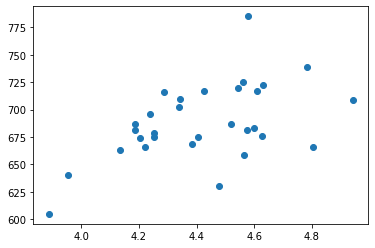

In [53]:
plt.scatter(x= wins_and_runs['R'], y = wins_and_runs['total_wins']);

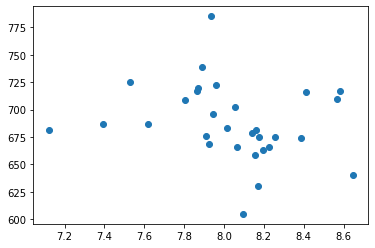

In [54]:
plt.scatter(x=wins_and_runs['SO'], y = wins_and_runs['total_wins']);

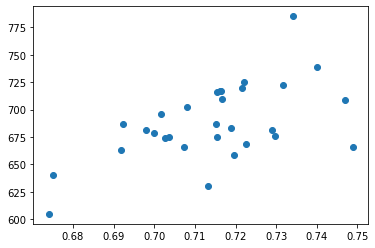

In [55]:
plt.scatter(x = wins_and_runs['onbase_plus_slugging'], y = wins_and_runs['total_wins']);

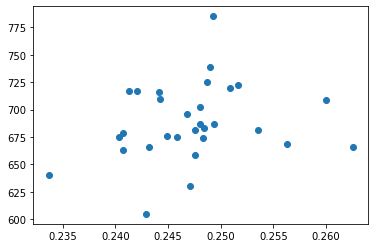

In [56]:
plt.scatter(x = wins_and_runs['batting_avg'], y = wins_and_runs['total_wins']);

In [57]:
# Runs per game important, OPS important, Strikeouts not as important- Trend Doesn't stand out

# Pitching

In [58]:
starters = pitchers.groupby(['team', 'game_id']).head(1)

In [59]:
starters = pd.merge(starters, games_df[['game_id','Home_win']]).drop_duplicates()

In [60]:
cond = ((starters['home?'] == True) & (starters['Home_win'] == 0),
       (starters['home?']==True)&(starters['Home_win']== 1),
       (starters['home?'] == False)&(starters['Home_win'] == 1),
       (starters['home?']==False)&(starters['Home_win']==0))

choices = ('L', 'W', 'L', 'W')

starters['Result?'] = np.select(cond, choices)

In [61]:
# starters['IP'] = starters['IP'].str.replace('.1', '.333')
# starters['IP'] = starters['IP'].str.replace('.1', '.667')

In [62]:
starters['IP'] = starters['IP'].astype(float)
starters['batters_faced'] = starters['batters_faced'].astype(float)
starters['SO'] = starters['SO'].astype(float)
starters['BB'] = starters['BB'].astype(float)
starters['earned_run_avg'] = starters['earned_run_avg'].astype(float)

In [63]:
starters[starters['IP']>0].groupby('Result?')['IP', 'batters_faced', 'BB'].mean()

<ipython-input-63-7018ae6c0962>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  starters[starters['IP']>0].groupby('Result?')['IP', 'batters_faced', 'BB'].mean()


,IP,batters_faced,BB
Result?,,,
L,5.218459,23.617349,1.906179
W,5.767841,24.030667,1.711206


In [64]:
starters.sort_values('IP')

,IP,H,R,ER,BB,SO,HR,earned_run_avg,batters_faced,pitches,strikes_total,strikes_contact,strikes_swinging,strikes_looking,inplay_gb_total,inplay_fb_total,inplay_ld,inplay_unk,game_score,inherited_runners,inherited_score,wpa_def,leverage_index_avg,cwpa_def,cli_avg,re24_def,name,home?,team,game_id,Home_win,Result?
24103,0.0,5.0,4.0,4.0,0.0,0.0,1.0,4.53,5.0,22,17,12,3,2,0,5,3,0,24,,,-0.346,0.91,-0.52%,2.29,-4.4,boydma01,True,DET,DET201609250,1,W
7067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.01,0.0,,,,,,,,,,50,,,,0.00,0.00%,0.00,0.0,richacl01,True,SDP,SDN201306210,1,W
5546,0.0,3.0,2.0,2.0,0.0,0.0,2.0,12.71,4.0,17,9,5,0,4,0,3,2,0,36,,,-0.260,0.79,-0.21%,1.05,-3.0,sanchjo01,False,PIT,SLN201304260,1,L
8275,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.89,1.0,2,1,1,0,0,0,1,1,0,48,,,-0.062,0.87,-0.04%,0.85,-0.6,millesh01,True,STL,SLN201308070,1,W
38974,0.0,3.0,5.0,5.0,3.0,0.0,0.0,inf,6.0,30,15,10,0,5,2,1,1,0,21,,,-0.365,1.45,-0.26%,1.74,-5.3,ohtansh01,False,LAA,OAK202007260,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,9.0,0.0,0.0,0.0,1.0,9.0,0.0,3.57,28.0,109,74,41,16,17,8,10,3,0,95,,,0.461,0.77,0.33%,0.92,4.0,baileho02,True,CIN,CIN201307020,1,W
12229,9.0,4.0,0.0,0.0,0.0,0.0,0.0,3.12,31.0,95,68,43,2,23,18,13,2,0,79,,,0.467,0.80,0.41%,1.16,4.2,porceri01,True,DET,DET201407010,1,W
11079,9.0,1.0,0.0,0.0,0.0,9.0,0.0,1.85,28.0,115,86,53,7,26,9,10,2,0,94,,,0.290,0.47,0.21%,0.56,4.0,wainwad01,True,STL,SLN201405200,1,W
5671,9.0,3.0,2.0,2.0,1.0,12.0,2.0,3.34,32.0,114,80,41,14,25,9,10,1,0,84,,,0.235,0.38,0.08%,0.23,2.1,feldmsc01,True,CHC,CHN201305010,1,W


In [65]:
# Winning teams tend to have starters that only go 2 thirds longer of the game longer

In [66]:
cond1 = (starters['Result?'] == 'W',  starters['Result?']== 'L')
choice1 = (True, False)

starters['winner'] = np.select(cond1, choice1)

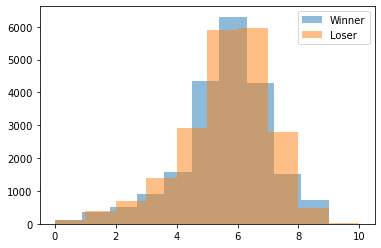

In [67]:
plt.hist(starters[starters['Result?'] == 'W']['IP'], alpha = 0.5, label = 'Winner')
plt.hist(starters[starters['Result?'] == 'L']['IP'], alpha = 0.5, label = 'Loser')
plt.legend();

In [68]:
#Not Much here. it looks like WInners are slightly more spread out than losers

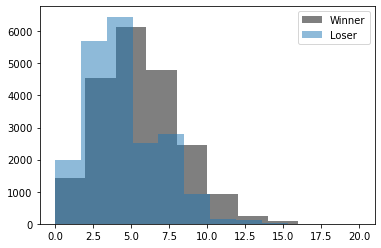

In [69]:
plt.hist(starters[starters['Result?'] == 'W']['SO'], alpha = 0.5, color='black',label = 'Winner')
plt.hist(starters[starters['Result?'] == 'L']['SO'], alpha = 0.5, label = 'Loser')
plt.legend();

In [70]:
# Starting Pitchers of winning teams tend to have more strikeouts

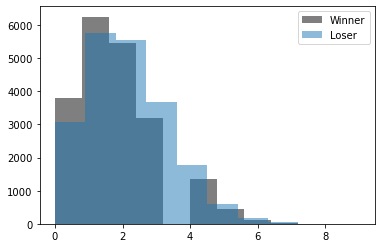

In [192]:
plt.hist(starters[starters['Result?'] == 'W']['BB'], alpha = 0.5, color='black',label = 'Winner')
plt.hist(starters[starters['Result?'] == 'L']['BB'], alpha = 0.5, label = 'Loser')
plt.legend();

In [72]:
# Starting Pitchers tend to have fewer walks, but not by much.

# League Trends

In [73]:
total_wins.head() 

,abbr,home_wins,total_home_games,sum_y,total_away_games,away_wins,total_wins,total_games
0,ARI,325,689,382,687,305,630,1376
1,ATL,375,685,363,690,327,702,1375
2,BAL,376,694,387,686,299,675,1380
3,BOS,367,688,346,688,342,709,1376
4,CHC,398,697,362,681,319,717,1378


In [74]:
total_wins['away_win_pct'] = total_wins['away_wins']/total_wins['total_away_games']
total_wins['home_win_pct'] = (total_wins['home_wins']/total_wins['total_home_games'])

In [75]:
print(f"league wide home win %: {total_wins['home_wins'].sum()/total_wins['total_home_games'].sum()}")
print(f"league wide away win %: {total_wins['away_wins'].sum()/total_wins['total_away_games'].sum()}")

league wide home win %: 0.5385397501694587
league wide away win %: 0.4614602498305413


In [76]:
# There is a significantly higher winning percentage on the road vs at home.

# Building Training Data

In [77]:
def rolling_stats(period, df, stat_col):
    for s in stat_col:
        #if 'object' in str(df[s].dtype): continue
        df[s+'_'+str(period)+'_Avg'] = df.groupby('team')[s].apply(lambda x: x.rolling(period).mean())
        df[s+'_'+str(period)+'_std'] = df.groupby('team')[s].apply(lambda x: x.rolling(period).std())
        
    return df


def get_diff_df(df, name, is_pitcher = False):
    df['date'] = pd.to_datetime(df['game_id'].str[3:-1], format='%Y%m%d')
    df = df.sort_values('date')
    df = df.set_index(df.groupby('date')['date'].apply(lambda x: x + np.arange(x.size).astype(np.timedelta64)))
    stat_columns = [x for x in df.columns if 'float' in str(df[x].dtype)]
    
    df = rolling_stats('5d', df, stat_columns)
    df = rolling_stats('10d', df, stat_columns)
    df = rolling_stats('45d', df, stat_columns)
    df = rolling_stats('180d', df, stat_columns)
    
    
    df.drop(columns = stat_columns, inplace = True)
    stat_columns = [x for x in df.columns if 'float' in str(df[x].dtype)]
    df = df.reset_index(drop = True)
    df = df.sort_values('date')
    
    
    for s in stat_columns:
        if is_pitcher:
            df[s] = df.groupby('name')[s].shift(1)
        else:
            df[s] = df.groupby('team')[s].shift(1)
            
            
    away_df = df[df['home?'] == False].copy()
    away_df = away_df.set_index('game_id')
    away_df = away_df[stat_columns]
    
    
    
    home_df = df[df['home?'] == True].copy()
    home_df = home_df.set_index('game_id')
    home_df = home_df[stat_columns]
    
    diff = home_df.subtract(away_df, fill_value = 0)
    diff = diff.reset_index()
    
    for s in stat_columns:
        colname = str(name + '_' + s)
        diff[colname] = diff[s]
        diff.drop(columns = s, inplace = True)
        
    return diff



In [78]:
df = games_df

In [79]:
df = pd.merge(left = df, right = get_diff_df(batting, 'batting'), on ='game_id', how = 'left')

In [80]:
df = pd.merge(left = df, right = get_diff_df(pitching, 'pitching'), on ='game_id', how = 'left')

In [81]:
df = pd.merge(left = df, right = get_diff_df(starters, 'pitchers', is_pitcher = True), on ='game_id', how = 'left')

In [82]:
df.shape

(20654, 412)

In [83]:
df.head(-30)

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win,consec_away,batting_AB_5d_Avg,batting_AB_5d_std,batting_R_5d_Avg,batting_R_5d_std,batting_H_5d_Avg,batting_H_5d_std,batting_RBI_5d_Avg,batting_RBI_5d_std,batting_BB_5d_Avg,batting_BB_5d_std,batting_SO_5d_Avg,batting_SO_5d_std,batting_PA_5d_Avg,batting_PA_5d_std,batting_batting_avg_5d_Avg,batting_batting_avg_5d_std,batting_onbase_perc_5d_Avg,batting_onbase_perc_5d_std,batting_slugging_perc_5d_Avg,batting_slugging_perc_5d_std,batting_onbase_plus_slugging_5d_Avg,batting_onbase_plus_slugging_5d_std,batting_pitches_5d_Avg,batting_pitches_5d_std,batting_strikes_total_5d_Avg,batting_strikes_total_5d_std,batting_wpa_bat_5d_Avg,batting_wpa_bat_5d_std,batting_leverage_index_avg_5d_Avg,batting_leverage_index_avg_5d_std,batting_AB_10d_Avg,batting_AB_10d_std,batting_R_10d_Avg,batting_R_10d_std,batting_H_10d_Avg,batting_H_10d_std,batting_RBI_10d_Avg,batting_RBI_10d_std,...,pitchers_re24_def_10d_Avg,pitchers_re24_def_10d_std,pitchers_IP_45d_Avg,pitchers_IP_45d_std,pitchers_H_45d_Avg,pitchers_H_45d_std,pitchers_R_45d_Avg,pitchers_R_45d_std,pitchers_ER_45d_Avg,pitchers_ER_45d_std,pitchers_BB_45d_Avg,pitchers_BB_45d_std,pitchers_SO_45d_Avg,pitchers_SO_45d_std,pitchers_HR_45d_Avg,pitchers_HR_45d_std,pitchers_earned_run_avg_45d_Avg,pitchers_earned_run_avg_45d_std,pitchers_batters_faced_45d_Avg,pitchers_batters_faced_45d_std,pitchers_leverage_index_avg_45d_Avg,pitchers_leverage_index_avg_45d_std,pitchers_cli_avg_45d_Avg,pitchers_cli_avg_45d_std,pitchers_re24_def_45d_Avg,pitchers_re24_def_45d_std,pitchers_IP_180d_Avg,pitchers_IP_180d_std,pitchers_H_180d_Avg,pitchers_H_180d_std,pitchers_R_180d_Avg,pitchers_R_180d_std,pitchers_ER_180d_Avg,pitchers_ER_180d_std,pitchers_BB_180d_Avg,pitchers_BB_180d_std,pitchers_SO_180d_Avg,pitchers_SO_180d_std,pitchers_HR_180d_Avg,pitchers_HR_180d_std,pitchers_earned_run_avg_180d_Avg,pitchers_earned_run_avg_180d_std,pitchers_batters_faced_180d_Avg,pitchers_batters_faced_180d_std,pitchers_leverage_index_avg_180d_Avg,pitchers_leverage_index_avg_180d_std,pitchers_cli_avg_180d_Avg,pitchers_cli_avg_180d_std,pitchers_re24_def_180d_Avg,pitchers_re24_def_180d_std
0,OAK201203280,SEA,OAK,2012-03-28,Start Time: 7:09 p.m. Local,mccarbr01,hernafe02,1,3,Wednesday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OAK201203290,SEA,OAK,2012-03-29,Start Time: 6:04 p.m. Local,colonba01,vargaja01,4,1,Thursday,1,NaN,0.00,NaN,-2.00,NaN,-3.0,NaN,-2.00,NaN,0.00,NaN,6.00,NaN,1.00,NaN,-0.07700,NaN,-0.03600,NaN,-0.10200,NaN,-0.13800,NaN,7.0,NaN,-2.00,NaN,-0.50000,NaN,0.1600,NaN,0.000000,NaN,-2.000000,NaN,-3.000000,NaN,-2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MIA201204040,STL,MIA,2012-04-04,Start Time: 7:15 p.m. Local,johnsjo09,lohseky01,1,4,Wednesday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CLE201204050,TOR,CLE,2012-04-05,Start Time: 3:08 p.m. Local,masteju01,romerri01,4,7,Thursday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# These graphs Were made before Rolling averages were used:

In [84]:
#plt.hist(df[df['Home_win'] == 1].batting_R)

### Come Back to these graphs ^ and below going in presentation

In [85]:
# Distribution of Run Differences before a win looks relatively normal

In [86]:
# plt.hist(df[df['Home_win'] == 1].batting_batting_avg)

In [87]:
# Dist of batting average is almost perfectly normal

In [88]:
# Rolling averages are going to be important because of this.

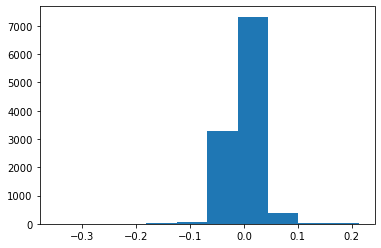

In [89]:
plt.hist(df[df['Home_win'] == 1].batting_batting_avg_45d_Avg);

(array([2.000e+00, 1.100e+01, 6.100e+01, 1.011e+03, 6.589e+03, 3.245e+03,
        1.620e+02, 1.900e+01, 1.200e+01, 4.000e+00]),
 array([-8. , -6.3, -4.6, -2.9, -1.2,  0.5,  2.2,  3.9,  5.6,  7.3,  9. ]),
 <BarContainer object of 10 artists>)

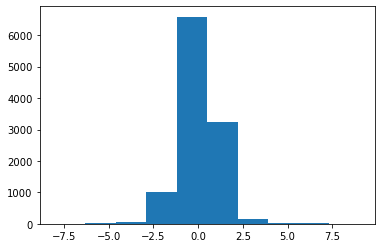

In [90]:
plt.hist((df[df['Home_win'] == 1].batting_R_45d_Avg))

In [91]:
starters['rest'] = starters.groupby('name')['date'].diff().dt.days

In [92]:
home_starters = starters[starters['home?'] == True]
away_starters = starters[starters['home?']==False]

In [93]:
home_starters = home_starters.rename(columns={'rest':'home_rest'})
away_starters = away_starters.rename(columns={'rest':'away_rest'})

In [94]:
away_starters

,IP,H,R,ER,BB,SO,HR,earned_run_avg,batters_faced,pitches,strikes_total,strikes_contact,strikes_swinging,strikes_looking,inplay_gb_total,inplay_fb_total,inplay_ld,inplay_unk,game_score,inherited_runners,inherited_score,wpa_def,leverage_index_avg,cwpa_def,cli_avg,re24_def,name,home?,team,game_id,Home_win,Result?,winner,date,away_rest
0,5.1,2.0,2.0,2.0,2.0,8.0,1.0,3.38,20.0,87,59,29,17,13,2,8,3,0,62,,,0.088,0.98,0.05%,0.95,0.9,giolilu01,False,CHW,ANA202104010,1,L,0,2021-04-01,NaN
2,3.0,1.0,2.0,1.0,3.0,2.0,0.0,3.00,14.0,63,33,15,6,12,5,4,1,0,50,,,-0.042,1.29,-0.03%,1.36,-0.5,kuhlch01,False,PIT,CHN202104010,0,W,1,2021-04-01,NaN
4,4.1,6.0,6.0,6.0,2.0,4.0,2.0,12.46,22.0,94,54,30,14,10,3,12,4,0,29,,,-0.111,0.43,-0.07%,0.47,-3.8,flaheja01,False,STL,CIN202104010,1,L,0,2021-04-01,NaN
6,5.2,10.0,6.0,5.0,1.0,2.0,0.0,7.94,28.0,77,55,38,6,11,19,6,4,0,28,,,-0.455,1.16,-0.29%,1.22,-3.0,kershcl01,False,LAD,COL202104010,1,L,0,2021-04-01,NaN
8,6.0,5.0,3.0,3.0,3.0,12.0,1.0,4.50,27.0,95,61,23,21,17,5,7,5,0,59,,,-0.116,0.55,-0.07%,0.59,0.0,biebesh01,False,CLE,DET202104010,1,L,0,2021-04-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41298,3.0,1.0,0.0,0.0,2.0,0.0,0.0,4.19,11.0,57,33,22,2,9,4,5,2,0,55,,,0.144,0.79,0.00%,0.00,1.5,goudeas01,False,COL,ARI202110030,1,L,0,2021-10-03,NaN
41300,1.0,3.0,2.0,2.0,0.0,0.0,1.0,9.00,5.0,16,9,7,1,1,0,5,3,0,39,,,-0.141,0.71,0.00%,0.00,-1.5,syndeno01,False,NYM,ATL202110030,1,L,0,2021-10-03,5.0
41302,6.0,4.0,1.0,1.0,2.0,4.0,1.0,3.81,24.0,85,58,35,7,16,10,8,3,0,62,,,0.284,1.09,0.00%,0.00,2.2,alexaty01,False,DET,CHA202110030,0,W,1,2021-10-03,5.0
41304,6.0,5.0,4.0,4.0,1.0,4.0,3.0,4.24,23.0,82,55,34,9,12,9,9,3,0,49,,,-0.219,1.06,0.00%,0.00,-0.8,irvinco01,False,OAK,HOU202110030,1,L,0,2021-10-03,6.0


In [95]:
df = pd.merge(df, 
         home_starters[['game_id', 'name', 'home_rest']], 
         left_on = ['game_id', 'home_pitcher'],
        right_on = ['game_id', 'name'],
        how = 'left')

In [96]:
df = pd.merge(df, 
         away_starters[['game_id', 'name', 'away_rest']], 
         left_on = ['game_id', 'away_pitcher'],
        right_on = ['game_id', 'name'],
        how = 'left')

In [97]:
df[df['home_rest']>df['away_rest']].value_counts('Home_win', normalize = True)

Home_win
1    0.5248
0    0.4752
dtype: float64

In [98]:
df[df['home_rest']<df['away_rest']].value_counts('Home_win', normalize = True)

Home_win
1    0.539921
0    0.460079
dtype: float64

In [99]:
df['rest_diff_home-away'] = df['home_rest'] - df['away_rest']

In [100]:
df.groupby('rest_diff_home-away')['Home_win'].mean()

rest_diff_home-away
-3106.0    0.0
-2858.0    1.0
-2840.0    1.0
-2622.0    0.0
-2111.0    0.0
          ... 
 1734.0    1.0
 1812.0    0.0
 1815.0    0.0
 2010.0    0.0
 2462.0    0.0
Name: Home_win, Length: 799, dtype: float64

In [101]:
df = df.drop(columns = ['home_rest', 'away_rest'])

In [102]:
import pickle

In [103]:
pickle.dump(df, open('dataframe.pkl', 'wb'))

# 2022 Games

In [104]:
games2022 = pickle.load(open('games2022.pkl', 'rb'))

In [105]:
games_2022 = []
batting_2022 = []
pitching_2022 = []
pitchers_2022 = []

for g in games2022:
    game_summary = g['game']
    game_summary['home_pitcher'] = g['home_pitchers'][0]['name']
    game_summary['away_pitcher'] = g['away_pitchers'][0]['name']
    game_summary['home_score'] = g['home_batting']['R']
    game_summary['away_score'] = g['away_batting']['R']
    games_2022.append(game_summary)
    

In [106]:
games_2022 = pd.DataFrame(games_2022)

In [107]:
for g in games2022:
    pairs = [
        ('away_batting', batting_2022),
        ('home_batting', batting_2022),
        ('away_pitching', pitching_2022),
        ('home_pitching', pitching_2022),
        ('away_pitchers',pitchers_2022 ),
        ('home_pitchers', pitchers_2022)
    ]
    for key, d in pairs:
        if isinstance(g[key], list):
            for x in g[key]:
                if 'home' in key:
                    x['home?'] = True
                    x['team']=g['game']['home_abbr']
                else:
                    x['home?'] = False
                    x['team'] = g['game']['away_abbr']
                x['game_id'] = g['game']['game_id']
                d.append(x)
                
        else:
            x = g[key]
            if 'home' in key:
                x['home?'] = True
                x['team'] = g['game']['home_abbr']
            else:
                x['home?'] = False
                x['team'] = g['game']['away_abbr']
            x['game_id'] = g['game']['game_id']
            d.append(x)
                

In [108]:
batting_2022 = pd.DataFrame(batting_2022)
pitching_2022 = pd.DataFrame(pitching_2022)
pitchers_2022 = pd.DataFrame(pitchers_2022)

In [109]:
batting_2022

,AB,R,H,RBI,BB,SO,PA,batting_avg,onbase_perc,slugging_perc,onbase_plus_slugging,pitches,strikes_total,wpa_bat,leverage_index_avg,wpa_bat_pos,wpa_bat_neg,cwpa_bat,cli_avg,re24_bat,PO,A,details,home?,team,game_id
0,35,3,8,3,3,10,38,.229,.289,.514,.804,140,88,-0.117,0.83,0.535,-0.652%,-0.07%,0.85,-1.8,27,13,,False,HOU,ANA202204070
1,29,1,4,1,1,7,31,.138,.194,.207,.400,111,72,-0.615,1.27,0.350,-0.966%,-0.36%,1.24,-3.8,27,10,,True,LAA,ANA202204070
2,29,2,4,2,7,5,36,.138,.306,.172,.478,165,102,-0.126,0.93,0.435,-0.560%,-0.08%,0.95,-2.5,24,8,,False,SDP,ARI202204070
3,26,4,3,3,7,6,34,.115,.324,.231,.554,143,75,0.375,1.62,1.112,-0.737%,0.22%,1.60,-0.0,27,9,,True,ARI,ARI202204070
4,35,6,10,6,1,13,38,.286,.316,.371,.687,142,94,0.207,0.71,0.594,-0.389%,0.12%,0.68,1.1,27,7,,False,CIN,ATL202204070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,33,5,9,5,2,8,36,.273,.306,.545,.851,141,89,-0.280,0.98,0.511,-0.793%,-0.18%,1.04,0.7,27,11,,True,TBR,TBA202206050
1616,42,6,12,5,4,9,47,.286,.362,.476,.838,177,104,0.045,1.79,1.416,-1.371%,0.02%,1.04,0.2,30,5,,False,SEA,TEX202206050
1617,39,5,9,5,1,8,40,.231,.250,.538,.788,154,105,-0.457,1.51,0.799,-1.255%,-0.22%,1.20,-0.8,30,8,,True,TEX,TEX202206050
1618,40,8,16,7,2,6,44,.400,.442,.600,1.042,173,114,0.331,0.53,0.632,-0.299%,0.25%,0.67,3.2,27,15,,False,MIN,TOR202206050


In [110]:
games_2022[['day', 'del1','del2','date']] = games_2022['date'].str.extract('(\w+)(,)(\s+)(\w+\s+\d+\W+\s+\d+)', expand=True )
games_2022 = games_2022.drop(columns = ['del1','del2'])

In [111]:
games_2022['date'] = pd.to_datetime(games_2022['date'])

In [112]:
cond = (games_2022['home_score']>games_2022['away_score'], games_2022['home_score']<games_2022['away_score'])
choices = (True, False)
games_2022['Home_win'] = np.select(cond, choices)

In [113]:
for x in numeric_pitching:
    try:
        pitching_2022[x] = pitching_2022[x].astype(float)
    except ValueError:
        pass

In [114]:
for x in numeric_pitchers:
    try:
        pitchers_2022[x] = pitchers_2022[x].astype(float)
    except ValueError:
        pass

In [115]:
for stat in numeric_stats:
    batting_2022[stat] = batting_2022[stat].astype(float)

In [116]:
df2022 = games_2022

In [117]:
starters2022 = pitchers_2022.groupby(['team', 'game_id']).head(1)

In [118]:
starters2022 = pd.merge(starters2022, games_2022[['game_id','Home_win']]).drop_duplicates()

In [119]:
starters2022 = starters2022[starters2022['earned_run_avg'] != '']

In [120]:
starters2022['earned_run_avg'] = starters2022['earned_run_avg'].astype(float)

In [121]:
df2022 = pd.merge(left = df2022, right = get_diff_df(batting_2022, 'batting'), on ='game_id', how = 'left')
df2022 = pd.merge(left = df2022, right = get_diff_df(pitching_2022, 'pitching'), on ='game_id', how = 'left')
df2022 = pd.merge(left = df2022, right = get_diff_df(starters2022, 'pitchers', is_pitcher = True), on ='game_id', how = 'left')

In [122]:
df2022.shape

(810, 411)

In [123]:
df.shape

(20654, 415)

In [124]:
starters2022['rest'] = starters2022.groupby('name')['date'].diff().dt.days

In [125]:
home_starters2022 = starters2022[starters2022['home?'] == True]
away_starters2022 = starters2022[starters2022['home?']==False]


In [126]:
home_starters2022 = home_starters2022.rename(columns={'rest':'home_rest'})
away_starters2022 = away_starters2022.rename(columns={'rest':'away_rest'})

In [127]:
df2022 = pd.merge(df2022, 
         home_starters2022[['game_id', 'name', 'home_rest']], 
         left_on = ['game_id', 'home_pitcher'],
        right_on = ['game_id', 'name'],
        how = 'left')

In [128]:
df2022 = pd.merge(df2022, 
         away_starters2022[['game_id', 'name', 'away_rest']], 
         left_on = ['game_id', 'away_pitcher'],
        right_on = ['game_id', 'name'],
        how = 'left')

In [129]:
df

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win,consec_away,batting_AB_5d_Avg,batting_AB_5d_std,batting_R_5d_Avg,batting_R_5d_std,batting_H_5d_Avg,batting_H_5d_std,batting_RBI_5d_Avg,batting_RBI_5d_std,batting_BB_5d_Avg,batting_BB_5d_std,batting_SO_5d_Avg,batting_SO_5d_std,batting_PA_5d_Avg,batting_PA_5d_std,batting_batting_avg_5d_Avg,batting_batting_avg_5d_std,batting_onbase_perc_5d_Avg,batting_onbase_perc_5d_std,batting_slugging_perc_5d_Avg,batting_slugging_perc_5d_std,batting_onbase_plus_slugging_5d_Avg,batting_onbase_plus_slugging_5d_std,batting_pitches_5d_Avg,batting_pitches_5d_std,batting_strikes_total_5d_Avg,batting_strikes_total_5d_std,batting_wpa_bat_5d_Avg,batting_wpa_bat_5d_std,batting_leverage_index_avg_5d_Avg,batting_leverage_index_avg_5d_std,batting_AB_10d_Avg,batting_AB_10d_std,batting_R_10d_Avg,batting_R_10d_std,batting_H_10d_Avg,batting_H_10d_std,batting_RBI_10d_Avg,batting_RBI_10d_std,...,pitchers_IP_45d_std,pitchers_H_45d_Avg,pitchers_H_45d_std,pitchers_R_45d_Avg,pitchers_R_45d_std,pitchers_ER_45d_Avg,pitchers_ER_45d_std,pitchers_BB_45d_Avg,pitchers_BB_45d_std,pitchers_SO_45d_Avg,pitchers_SO_45d_std,pitchers_HR_45d_Avg,pitchers_HR_45d_std,pitchers_earned_run_avg_45d_Avg,pitchers_earned_run_avg_45d_std,pitchers_batters_faced_45d_Avg,pitchers_batters_faced_45d_std,pitchers_leverage_index_avg_45d_Avg,pitchers_leverage_index_avg_45d_std,pitchers_cli_avg_45d_Avg,pitchers_cli_avg_45d_std,pitchers_re24_def_45d_Avg,pitchers_re24_def_45d_std,pitchers_IP_180d_Avg,pitchers_IP_180d_std,pitchers_H_180d_Avg,pitchers_H_180d_std,pitchers_R_180d_Avg,pitchers_R_180d_std,pitchers_ER_180d_Avg,pitchers_ER_180d_std,pitchers_BB_180d_Avg,pitchers_BB_180d_std,pitchers_SO_180d_Avg,pitchers_SO_180d_std,pitchers_HR_180d_Avg,pitchers_HR_180d_std,pitchers_earned_run_avg_180d_Avg,pitchers_earned_run_avg_180d_std,pitchers_batters_faced_180d_Avg,pitchers_batters_faced_180d_std,pitchers_leverage_index_avg_180d_Avg,pitchers_leverage_index_avg_180d_std,pitchers_cli_avg_180d_Avg,pitchers_cli_avg_180d_std,pitchers_re24_def_180d_Avg,pitchers_re24_def_180d_std,name_x,name_y,rest_diff_home-away
0,OAK201203280,SEA,OAK,2012-03-28,Start Time: 7:09 p.m. Local,mccarbr01,hernafe02,1,3,Wednesday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mccarbr01,hernafe02,NaN
1,OAK201203290,SEA,OAK,2012-03-29,Start Time: 6:04 p.m. Local,colonba01,vargaja01,4,1,Thursday,1,NaN,0.000000,NaN,-2.0,NaN,-3.000000,NaN,-2.000000,NaN,0.000000,NaN,6.00,NaN,1.000000,NaN,-0.07700,NaN,-0.036000,NaN,-0.102000,NaN,-0.138000,NaN,7.000000,NaN,-2.000000,NaN,-0.50000,NaN,0.160000,NaN,0.000000,NaN,-2.000000,NaN,-3.000000,NaN,-2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,colonba01,vargaja01,NaN
2,MIA201204040,STL,MIA,2012-04-04,Start Time: 7:15 p.m. Local,johnsjo09,lohseky01,1,4,Wednesday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,johnsjo09,lohseky01,NaN
3,CLE201204050,TOR,CLE,2012-04-05,Start Time: 3:08 p.m. Local,masteju01,romerri01,4,7,Thursday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [130]:
df2022['rest_diff_home-away'] = df2022['home_rest'] - df2022['away_rest']

In [131]:
df2022 = df2022.drop(columns=['away_rest', 'home_rest'])

In [132]:
df2022.shape

(810, 414)

In [133]:
set(df.columns.to_list()) - set(df2022.columns.to_list()) 

{'consec_away'}

In [134]:
df.shape

(20654, 415)

In [135]:
pickle.dump(df2022, open('dataframe2022.pkl', 'wb'))

In [136]:
df2022

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win,batting_AB_5d_Avg,batting_AB_5d_std,batting_R_5d_Avg,batting_R_5d_std,batting_H_5d_Avg,batting_H_5d_std,batting_RBI_5d_Avg,batting_RBI_5d_std,batting_BB_5d_Avg,batting_BB_5d_std,batting_SO_5d_Avg,batting_SO_5d_std,batting_PA_5d_Avg,batting_PA_5d_std,batting_batting_avg_5d_Avg,batting_batting_avg_5d_std,batting_onbase_perc_5d_Avg,batting_onbase_perc_5d_std,batting_slugging_perc_5d_Avg,batting_slugging_perc_5d_std,batting_onbase_plus_slugging_5d_Avg,batting_onbase_plus_slugging_5d_std,batting_pitches_5d_Avg,batting_pitches_5d_std,batting_strikes_total_5d_Avg,batting_strikes_total_5d_std,batting_wpa_bat_5d_Avg,batting_wpa_bat_5d_std,batting_leverage_index_avg_5d_Avg,batting_leverage_index_avg_5d_std,batting_AB_10d_Avg,batting_AB_10d_std,batting_R_10d_Avg,batting_R_10d_std,batting_H_10d_Avg,batting_H_10d_std,batting_RBI_10d_Avg,batting_RBI_10d_std,batting_BB_10d_Avg,...,pitchers_IP_45d_std,pitchers_H_45d_Avg,pitchers_H_45d_std,pitchers_R_45d_Avg,pitchers_R_45d_std,pitchers_ER_45d_Avg,pitchers_ER_45d_std,pitchers_BB_45d_Avg,pitchers_BB_45d_std,pitchers_SO_45d_Avg,pitchers_SO_45d_std,pitchers_HR_45d_Avg,pitchers_HR_45d_std,pitchers_earned_run_avg_45d_Avg,pitchers_earned_run_avg_45d_std,pitchers_batters_faced_45d_Avg,pitchers_batters_faced_45d_std,pitchers_leverage_index_avg_45d_Avg,pitchers_leverage_index_avg_45d_std,pitchers_cli_avg_45d_Avg,pitchers_cli_avg_45d_std,pitchers_re24_def_45d_Avg,pitchers_re24_def_45d_std,pitchers_IP_180d_Avg,pitchers_IP_180d_std,pitchers_H_180d_Avg,pitchers_H_180d_std,pitchers_R_180d_Avg,pitchers_R_180d_std,pitchers_ER_180d_Avg,pitchers_ER_180d_std,pitchers_BB_180d_Avg,pitchers_BB_180d_std,pitchers_SO_180d_Avg,pitchers_SO_180d_std,pitchers_HR_180d_Avg,pitchers_HR_180d_std,pitchers_earned_run_avg_180d_Avg,pitchers_earned_run_avg_180d_std,pitchers_batters_faced_180d_Avg,pitchers_batters_faced_180d_std,pitchers_leverage_index_avg_180d_Avg,pitchers_leverage_index_avg_180d_std,pitchers_cli_avg_180d_Avg,pitchers_cli_avg_180d_std,pitchers_re24_def_180d_Avg,pitchers_re24_def_180d_std,name_x,name_y,rest_diff_home-away
0,ANA202204070,HOU,LAA,2022-04-07,Start Time: 6:38 p.m. Local,ohtansh01,valdefr01,1,3,Thursday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ohtansh01,valdefr01,NaN
1,ARI202204070,SDP,ARI,2022-04-07,Start Time: 6:40 p.m. Local,bumgama01,darviyu01,4,2,Thursday,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bumgama01,darviyu01,NaN
2,ATL202204070,CIN,ATL,2022-04-07,Start Time: 8:08 p.m. Local,friedma01,mahlety01,3,6,Thursday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,friedma01,mahlety01,NaN
3,CHN202204070,MIL,CHC,2022-04-07,Start Time: 1:20 p.m. Local,hendrky01,burneco01,5,4,Thursday,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Preparing June 7 Games:

In [137]:
games_june7= pickle.load(open('gamesjune7.pkl', 'rb'))

In [138]:
games_today = []
batting_today = []
pitching_today = []
pitchers_today = []

for g in games_june7:
    game_summary = g['game']
    if 'is_test' not in game_summary.keys(): game_summary['is_test'] = False
    game_summary['home_pitcher'] = g['home_pitchers'][0]['name']
    game_summary['away_pitcher'] = g['away_pitchers'][0]['name']
    game_summary['home_score'] = g['home_batting']['R']
    game_summary['away_score'] = g['away_batting']['R']
    games_today.append(game_summary)
    

In [139]:
gamesjune7= pd.DataFrame(games_today)

In [140]:
for g in games_june7:
    pairs = [
        ('away_batting', batting_today),
        ('home_batting', batting_today),
        ('away_pitching', pitching_today),
        ('home_pitching', pitching_today),
        ('away_pitchers',pitchers_today ),
        ('home_pitchers', pitchers_today)
    ]
    for key, d in pairs:
        if isinstance(g[key], list):
            for x in g[key]:
                if 'home' in key:
                    x['home?'] = True
                    x['team']=g['game']['home_abbr']
                else:
                    x['home?'] = False
                    x['team'] = g['game']['away_abbr']
                x['game_id'] = g['game']['game_id']
                d.append(x)
                
        else:
            x = g[key]
            if 'home' in key:
                x['home?'] = True
                x['team'] = g['game']['home_abbr']
            else:
                x['home?'] = False
                x['team'] = g['game']['away_abbr']
            x['game_id'] = g['game']['game_id']
            d.append(x)

In [141]:
batting_june7 = pd.DataFrame(batting_today)
pitching_june7 = pd.DataFrame(pitching_today)
pitchers_june7 = pd.DataFrame(pitchers_today)

In [142]:
gamesjune7[['day', 'del1','del2','date']] = gamesjune7['date'].str.extract('(\w+)(,)(\s+)(\w+\s+\d+\W+\s+\d+)', expand=True )
gamesjune7 = gamesjune7.drop(columns = ['del1','del2'])

In [143]:
gamesjune7['date'] = pd.to_datetime(gamesjune7['date'])

In [144]:
cond = (gamesjune7['home_score']>gamesjune7['away_score'], gamesjune7['home_score']<gamesjune7['away_score'], gamesjune7['home_score'] == gamesjune7['away_score'])
choices = (True, False, np.nan)
gamesjune7['Home_win'] = np.select(cond, choices)

In [145]:
for x in numeric_pitching:
    try:
        pitching_june7[x] = pitching_june7[x].astype(float)
    except ValueError:
        pass

for x in numeric_pitchers:
    try:
        pitchers_june7[x] = pitchers_june7[x].astype(float)
    except ValueError:
        pass
    
for stat in numeric_stats:
    batting_june7[stat] = batting_june7[stat].astype(float)


In [146]:
df_june7 = gamesjune7

In [147]:
startersjune7 = pitchers_june7.groupby(['team', 'game_id']).head(1)

In [148]:
startersjune7 = pd.merge(startersjune7, gamesjune7[['game_id','Home_win']]).drop_duplicates()

In [149]:
startersjune7 = startersjune7[startersjune7['earned_run_avg'] != '']

In [150]:
startersjune7['earned_run_avg'] = startersjune7['earned_run_avg'].astype(float)

In [151]:
df_june7 = pd.merge(left = df_june7, right = get_diff_df(batting_june7, 'batting'), on ='game_id', how = 'left')
df_june7 = pd.merge(left = df_june7, right = get_diff_df(pitching_june7, 'pitching'), on ='game_id', how = 'left')
df_june7 = pd.merge(left = df_june7, right = get_diff_df(startersjune7, 'pitchers', is_pitcher = True), on ='game_id', how = 'left')

In [152]:
startersjune7['rest'] = startersjune7.groupby('name')['date'].diff().dt.days

In [153]:
home_startersjune7 = startersjune7[startersjune7['home?'] == True]
away_startersjune7 = startersjune7[startersjune7['home?']==False]

home_startersjune7 = home_startersjune7.rename(columns={'rest':'home_rest'})
away_startersjune7 = away_startersjune7.rename(columns={'rest':'away_rest'})

In [154]:
df_june7 = pd.merge(df_june7, 
        home_startersjune7[['game_id', 'name', 'home_rest']], 
         left_on = ['game_id', 'home_pitcher'],
        right_on = ['game_id', 'name'],
        how = 'left')

In [155]:
df_june7 = pd.merge(df_june7, 
        away_startersjune7[['game_id', 'name', 'away_rest']], 
         left_on = ['game_id', 'home_pitcher'],
        right_on = ['game_id', 'name'],
        how = 'left')

In [156]:
df_june7['rest_diff_home-away'] = df_june7['home_rest'] - df_june7['away_rest']

In [157]:
df_june7 = df_june7.drop(columns=['away_rest', 'home_rest'])

In [158]:
df_june7 = df_june7.drop(columns=['name_x','name_y'])

In [159]:
df_june7

,game_id,away_abbr,home_abbr,date,time,is_test,home_pitcher,away_pitcher,home_team_win,home_score,away_score,day,Home_win,batting_AB_5d_Avg,batting_AB_5d_std,batting_R_5d_Avg,batting_R_5d_std,batting_H_5d_Avg,batting_H_5d_std,batting_RBI_5d_Avg,batting_RBI_5d_std,batting_BB_5d_Avg,batting_BB_5d_std,batting_SO_5d_Avg,batting_SO_5d_std,batting_PA_5d_Avg,batting_PA_5d_std,batting_batting_avg_5d_Avg,batting_batting_avg_5d_std,batting_onbase_perc_5d_Avg,batting_onbase_perc_5d_std,batting_slugging_perc_5d_Avg,batting_slugging_perc_5d_std,batting_onbase_plus_slugging_5d_Avg,batting_onbase_plus_slugging_5d_std,batting_pitches_5d_Avg,batting_pitches_5d_std,batting_strikes_total_5d_Avg,batting_strikes_total_5d_std,batting_wpa_bat_5d_Avg,batting_wpa_bat_5d_std,batting_leverage_index_avg_5d_Avg,batting_leverage_index_avg_5d_std,batting_AB_10d_Avg,batting_AB_10d_std,batting_R_10d_Avg,batting_R_10d_std,batting_H_10d_Avg,batting_H_10d_std,batting_RBI_10d_Avg,...,pitchers_H_45d_std,pitchers_R_45d_Avg,pitchers_R_45d_std,pitchers_ER_45d_Avg,pitchers_ER_45d_std,pitchers_BB_45d_Avg,pitchers_BB_45d_std,pitchers_SO_45d_Avg,pitchers_SO_45d_std,pitchers_HR_45d_Avg,pitchers_HR_45d_std,pitchers_earned_run_avg_45d_Avg,pitchers_earned_run_avg_45d_std,pitchers_batters_faced_45d_Avg,pitchers_batters_faced_45d_std,pitchers_leverage_index_avg_45d_Avg,pitchers_leverage_index_avg_45d_std,pitchers_cli_avg_45d_Avg,pitchers_cli_avg_45d_std,pitchers_re24_def_45d_Avg,pitchers_re24_def_45d_std,pitchers_Home_win_45d_Avg,pitchers_Home_win_45d_std,pitchers_IP_180d_Avg,pitchers_IP_180d_std,pitchers_H_180d_Avg,pitchers_H_180d_std,pitchers_R_180d_Avg,pitchers_R_180d_std,pitchers_ER_180d_Avg,pitchers_ER_180d_std,pitchers_BB_180d_Avg,pitchers_BB_180d_std,pitchers_SO_180d_Avg,pitchers_SO_180d_std,pitchers_HR_180d_Avg,pitchers_HR_180d_std,pitchers_earned_run_avg_180d_Avg,pitchers_earned_run_avg_180d_std,pitchers_batters_faced_180d_Avg,pitchers_batters_faced_180d_std,pitchers_leverage_index_avg_180d_Avg,pitchers_leverage_index_avg_180d_std,pitchers_cli_avg_180d_Avg,pitchers_cli_avg_180d_std,pitchers_re24_def_180d_Avg,pitchers_re24_def_180d_std,pitchers_Home_win_180d_Avg,pitchers_Home_win_180d_std,rest_diff_home-away
0,ANA202204070,HOU,LAA,2022-04-07,Start Time: 6:38 p.m. Local,False,ohtansh01,valdefr01,False,1,3,Thursday,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARI202204070,SDP,ARI,2022-04-07,Start Time: 6:40 p.m. Local,False,bumgama01,darviyu01,NaN,4,2,Thursday,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ATL202204070,CIN,ATL,2022-04-07,Start Time: 8:08 p.m. Local,False,friedma01,mahlety01,NaN,3,6,Thursday,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CHN202204070,MIL,CHC,2022-04-07,Start Time: 1:20 p.m. Local,False,hendrky01,burneco01,NaN,5,4,Thursday,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [160]:
pickle.dump(df_june7, open('df_june7.pkl', 'wb'))

In [ ]:
# Creating Reusable Functions For Future 

In [193]:
def get_todays_game_df(dictionary):
    games_today = []

    for g in dictionary:
        game_summary = g['game']
        if 'is_test' not in game_summary.keys(): game_summary['is_test'] = False
        game_summary['home_pitcher'] = g['home_pitchers'][0]['name']
        game_summary['away_pitcher'] = g['away_pitchers'][0]['name']
        game_summary['home_score'] = g['home_batting']['R']
        game_summary['away_score'] = g['away_batting']['R']
        games_today.append(game_summary)
    
    return pd.DataFrame(games_today)

def get_todays_stats(dictionary):
    batting_today = []
    pitching_today = []
    pitchers_today = []
    for g in dictionary:
        pairs = [
            ('away_batting', batting_today),
            ('home_batting', batting_today),
            ('away_pitching', pitching_today),
            ('home_pitching', pitching_today),
            ('away_pitchers',pitchers_today ),
            ('home_pitchers', pitchers_today)
        ]
        for key, d in pairs:
            if isinstance(g[key], list):
                for x in g[key]:
                    if 'home' in key:
                        x['home?'] = True
                        x['team']=g['game']['home_abbr']
                    else:
                        x['home?'] = False
                        x['team'] = g['game']['away_abbr']
                    x['game_id'] = g['game']['game_id']
                    d.append(x)

            else:
                x = g[key]
                if 'home' in key:
                    x['home?'] = True
                    x['team'] = g['game']['home_abbr']
                else:
                    x['home?'] = False
                    x['team'] = g['game']['away_abbr']
                x['game_id'] = g['game']['game_id']
                d.append(x)
    return pd.DataFrame(batting_today), pd.DataFrame(pitching_today), pd.DataFrame(pitchers_today)

def get_todays_rolling(dictionary):
    df = pd.DataFrame(get_todays_game_df(dictionary))
    batting_today, pitching_today, pitchers_today = get_todays_stats(dictionary)
    df[['day', 'del1','del2','date']] = df['date'].str.extract('(\w+)(,)(\s+)(\w+\s+\d+\W+\s+\d+)', expand=True )
    df = df.drop(columns = ['del1','del2'])
    df['date'] = pd.to_datetime(df['date'])
    cond = (df['home_score']>df['away_score'], df['home_score']<df['away_score'], df['home_score'] == df['away_score'])
    choices = (True, False, np.nan)
    df['Home_win'] = np.select(cond, choices)
    for x in numeric_pitching:
        try:
            pitching_today[x] = pitching_today[x].astype(float)
        except ValueError:
            pass

    for x in numeric_pitchers:
        try:
            pitchers_today[x] = pitchers_today[x].astype(float)
        except ValueError:
            pass

    for stat in numeric_stats:
        batting_today[stat] = batting_today[stat].astype(float)
        
    starters_today = pitchers_today.groupby(['team', 'game_id']).head(1)
    starters_today = pd.merge(starters_today, df[['game_id','Home_win']]).drop_duplicates()
    starters_today = starters_today[starters_today['earned_run_avg'] != '']
    starters_today['earned_run_avg'] = starters_today['earned_run_avg'].astype(float)
    
    df = pd.merge(left = df, right = get_diff_df(batting_today, 'batting'), on ='game_id', how = 'left')
    df = pd.merge(left = df, right = get_diff_df(pitching_today, 'pitching'), on ='game_id', how = 'left')
    df = pd.merge(left = df, right = get_diff_df(starters_today, 'pitchers', is_pitcher = True), on ='game_id', how = 'left')
    
    starters_today['rest'] = starters_today.groupby('name')['date'].diff().dt.days
    home_starters_today = starters_today[starters_today['home?'] == True]
    away_starters_today = starters_today[starters_today['home?']==False]

    home_starters_today = home_starters_today.rename(columns={'rest':'home_rest'})
    away_starters_today = away_starters_today.rename(columns={'rest':'away_rest'})
    
    df = pd.merge(df, 
        home_starters_today[['game_id', 'name', 'home_rest']], 
         left_on = ['game_id', 'home_pitcher'],
        right_on = ['game_id', 'name'],
        how = 'left')
    df = pd.merge(df, 
        away_starters_today[['game_id', 'name', 'away_rest']], 
         left_on = ['game_id', 'home_pitcher'],
        right_on = ['game_id', 'name'],
        how = 'left')
    df['rest_diff_home-away'] = df['home_rest'] - df['away_rest']
    df = df.drop(columns=['away_rest', 'home_rest'])
    df = df.drop(columns=['name_x','name_y'])
    
    return df

In [162]:
batting_today, pitching_today, pitchers_today = get_todays_stats(games_june7)

,IP,H,R,ER,BB,SO,HR,earned_run_avg,batters_faced,pitches,strikes_total,strikes_contact,strikes_swinging,strikes_looking,inplay_gb_total,inplay_fb_total,inplay_ld,inplay_unk,game_score,inherited_runners,inherited_score,wpa_def,leverage_index_avg,cwpa_def,cli_avg,re24_def,home?,team,game_id
0,9,4,1,1,1,7,0,1.00,31,111,72,38,15,19,13,9,4,0,75,2,0,0.616,1.27,0.37%,1.29,3.8,False,HOU,ANA202204070
1,9,8,3,3,3,10,2,3.00,38,140,88,45,17,26,10,15,7,0,60,2,0,0.116,0.83,0.07%,0.81,1.8,True,LAA,ANA202204070
2,8,3,4,4,7,6,1,4.50,34,143,75,39,13,23,9,11,2,0,71,4,3,-0.375,1.62,-0.23%,1.65,0.0,False,SDP,ARI202204070
3,9,4,2,2,7,5,0,2.00,36,165,102,58,10,34,9,15,5,0,51,2,0,0.126,0.93,0.08%,0.93,2.6,True,ARI,ARI202204070
4,9,4,3,2,5,13,1,2.00,36,158,96,46,24,26,9,9,4,0,64,0,0,0.293,0.79,0.17%,0.76,1.9,False,CIN,ATL202204070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,LAA,ANA202206070
1646,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NYM,SDN202206070
1647,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,SDP,SDN202206070
1648,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,COL,SFN202206070


In [194]:
get_rolling_df_today(games_june7)

,game_id,away_abbr,home_abbr,date,time,is_test,home_pitcher,away_pitcher,home_team_win,home_score,away_score,day,Home_win,batting_AB_5d_Avg,batting_AB_5d_std,batting_R_5d_Avg,batting_R_5d_std,batting_H_5d_Avg,batting_H_5d_std,batting_RBI_5d_Avg,batting_RBI_5d_std,batting_BB_5d_Avg,batting_BB_5d_std,batting_SO_5d_Avg,batting_SO_5d_std,batting_PA_5d_Avg,batting_PA_5d_std,batting_batting_avg_5d_Avg,batting_batting_avg_5d_std,batting_onbase_perc_5d_Avg,batting_onbase_perc_5d_std,batting_slugging_perc_5d_Avg,batting_slugging_perc_5d_std,batting_onbase_plus_slugging_5d_Avg,batting_onbase_plus_slugging_5d_std,batting_pitches_5d_Avg,batting_pitches_5d_std,batting_strikes_total_5d_Avg,batting_strikes_total_5d_std,batting_wpa_bat_5d_Avg,batting_wpa_bat_5d_std,batting_leverage_index_avg_5d_Avg,batting_leverage_index_avg_5d_std,batting_AB_10d_Avg,batting_AB_10d_std,batting_R_10d_Avg,batting_R_10d_std,batting_H_10d_Avg,batting_H_10d_std,batting_RBI_10d_Avg,...,pitchers_H_45d_std,pitchers_R_45d_Avg,pitchers_R_45d_std,pitchers_ER_45d_Avg,pitchers_ER_45d_std,pitchers_BB_45d_Avg,pitchers_BB_45d_std,pitchers_SO_45d_Avg,pitchers_SO_45d_std,pitchers_HR_45d_Avg,pitchers_HR_45d_std,pitchers_earned_run_avg_45d_Avg,pitchers_earned_run_avg_45d_std,pitchers_batters_faced_45d_Avg,pitchers_batters_faced_45d_std,pitchers_leverage_index_avg_45d_Avg,pitchers_leverage_index_avg_45d_std,pitchers_cli_avg_45d_Avg,pitchers_cli_avg_45d_std,pitchers_re24_def_45d_Avg,pitchers_re24_def_45d_std,pitchers_Home_win_45d_Avg,pitchers_Home_win_45d_std,pitchers_IP_180d_Avg,pitchers_IP_180d_std,pitchers_H_180d_Avg,pitchers_H_180d_std,pitchers_R_180d_Avg,pitchers_R_180d_std,pitchers_ER_180d_Avg,pitchers_ER_180d_std,pitchers_BB_180d_Avg,pitchers_BB_180d_std,pitchers_SO_180d_Avg,pitchers_SO_180d_std,pitchers_HR_180d_Avg,pitchers_HR_180d_std,pitchers_earned_run_avg_180d_Avg,pitchers_earned_run_avg_180d_std,pitchers_batters_faced_180d_Avg,pitchers_batters_faced_180d_std,pitchers_leverage_index_avg_180d_Avg,pitchers_leverage_index_avg_180d_std,pitchers_cli_avg_180d_Avg,pitchers_cli_avg_180d_std,pitchers_re24_def_180d_Avg,pitchers_re24_def_180d_std,pitchers_Home_win_180d_Avg,pitchers_Home_win_180d_std,rest_diff_home-away
0,ANA202204070,HOU,LAA,2022-04-07,Start Time: 6:38 p.m. Local,False,ohtansh01,valdefr01,False,1,3,Thursday,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARI202204070,SDP,ARI,2022-04-07,Start Time: 6:40 p.m. Local,False,bumgama01,darviyu01,NaN,4,2,Thursday,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ATL202204070,CIN,ATL,2022-04-07,Start Time: 8:08 p.m. Local,False,friedma01,mahlety01,NaN,3,6,Thursday,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CHN202204070,MIL,CHC,2022-04-07,Start Time: 1:20 p.m. Local,False,hendrky01,burneco01,NaN,5,4,Thursday,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N